# ACX Supply Simulator

Modeling supply & inflation rate for different decay curves

In [2]:
# Modules
import pandas as pd
import matplotlib as mpl

# SUPPLY FUNCTIONS
def inflation_decay(year, supply, infl):
    if infl <= target_infl:
        values.append([year, supply, target_infl])
        for i in range(0,year):
            values.append([year+i, supply, target_infl])
            supply += supply*target_infl
        return
    values.append([year, supply, infl])
    inflation_decay(year + 1, supply+supply*infl, infl-decay_rate)
    
def constant_inflation(year, supply, infl):
    values.append([year,supply,infl])
    if year == 40:
        return
    constant_inflation(year + 1, supply+supply*infl, infl)

def block_reward_halving(total_supply):
    reward_era_length = total_supply/100
    arr = []
    supply = 0
    block_base = 50*(10**8)
    for i in range(0,24):
        block_reward = block_base >> i
        temp = supply
        supply += (reward_era_length*block_reward)/(10**8)
        if i==0:
            inflation = 1
        else:
            inflation = supply/float(temp) - 1
        arr.append([i, supply, block_reward/(10**8), inflation])
    return arr

# HELPER FUNCTIONS
def graph_it(title, x_data, x_name, left_data, left_name, right_data, right_name):
    df = pd.DataFrame(values,  columns=[x_data, left_data, right_data])
    df.index.name = x_name
    left = df[left_data].plot(color='blue', title = title)
    left.set_ylabel(left_name)
    left.yaxis.label.set_color('blue')
    right = df[right_data].plot(secondary_y=[right_data], color='orange')
    right.set_ylabel(right_name)
    right.yaxis.label.set_color('orange')
    mpl.pyplot.show()


# Exponential Inflation Decay (The Bitcoin Model)
Bitcoin uses an exponential decay model where inflation decreseases at an increasing rate. An initial block reward of 50 BTC halves every 210,000 blocks until going to 0, resulting in a total supply of 21 million.

Simulated here w/ 50 ACX block reward that halves every 150,000 'blocks' until reaching a supply of 15 million.
(15 million b/c 25% of the 60 million ACX pool is allocated to the contributor rewards pool)

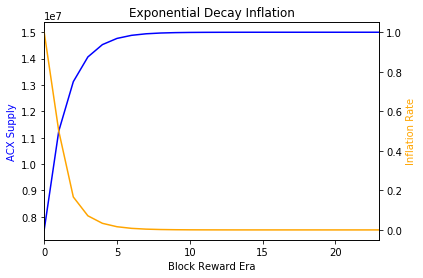

In [6]:
total_supply = 15000000
values = []
values = block_reward_halving(total_supply)
for x in values:
    del x[2]
title = 'Exponential Decay Inflation'
graph_it(title, 'block','Block Reward Era', 'supply', 'ACX Supply', 'inflation', 'Inflation Rate')

In [22]:
# total_supply = 15000000
# values = []
# values = block_reward_halving(total_supply)
# for x in values:
#     del x[3]
# title = 'Bitcoin-like Decay (Block Reward)'
# graph_it(title, 'block','Block Reward Era', 'supply', 'ACX Supply', 'block_reward', 'Block Reward')

# Linear Inflation Decay
This model simulates inflation decaying at a constant rate down to 0; very similar to the Bitcoin decay but inflation decays at a steady rate

Simulated here w/ initial supply of 22 million & annual inflation of 10%, which reaches a total supply of 60 million after about 20 years

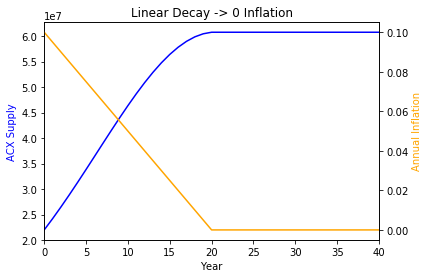

In [9]:
initial_supply = 22000000
initial_infl = 0.1
decay_rate = 0.005
target_infl = 0
values = []
inflation_decay(0, initial_supply, initial_infl)
title = 'Linear Decay -> 0 Inflation'
graph_it(title, 'year','Year', 'supply', 'ACX Supply', 'inflation', 'Annual Inflation')

# Constant Inflation
Stellar-Lumens uses a constant inflation model where inflation is permanently set at 1.0% per year

Simulated here w/ initial supply of 60 million

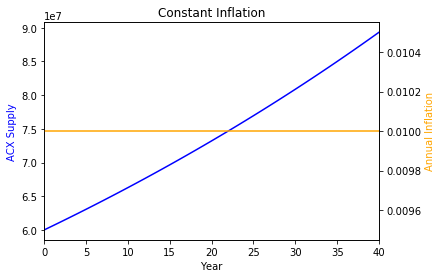

In [10]:
initial_supply = 60000000
inflation_constant = 0.01
values = []
constant_inflation(0, initial_supply, inflation_constant)
title = 'Constant Inflation'
graph_it(title, 'year', 'Year', 'supply', 'ACX Supply', 'inflation', 'Annual Inflation')

# Linear Inflation Decay to Constant Inflation (Hybrid)

Steemit uses a linear inflation decay -> constant inflation model. Inflation starts at 10% a year then decreases by 0.5% each year until leveling out at a permanent rate of 1.0% per year.

Simulated here w/ initial supply of 60 million

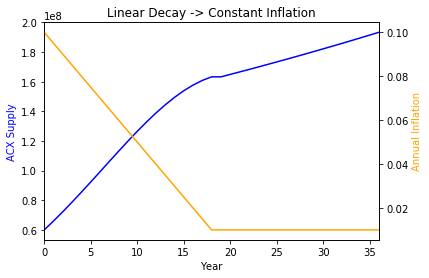

In [11]:
initial_supply = 60000000
initial_infl = 0.1
decay_rate = 0.005
target_infl = 0.01
values = []
inflation_decay(0, initial_supply, initial_infl)
title = 'Linear Decay -> Constant Inflation'
graph_it(title, 'year','Year', 'supply', 'ACX Supply', 'inflation', 'Annual Inflation')